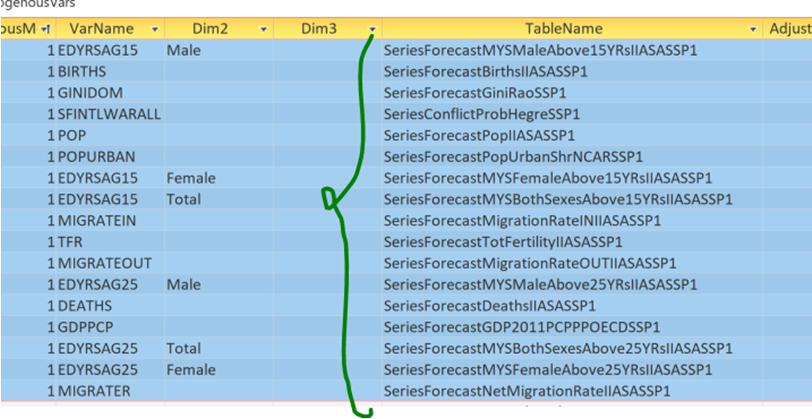

In [3]:
import pandas as pd
import numpy as np
import time
import re
import os

In [4]:
# download data based on wiki page
# https://pardeewiki.du.edu/index.php?title=GDP
ssp = pd.read_excel("SSP_3_basic_drivers_Full.xlsx", sheet_name="data")
# ssp = ssp[ssp.Scenario.str.contains("Phase")]
###
cc = pd.read_excel("country concordance SSP 20240214.xlsx")
c_ifs = cc.Country.unique()
dt_frame = cc[["Country","FIPS_CODE"]].copy(True)
ssp_to_ifs = dict(zip(cc.Country_SSP, cc.Country))
ssp.Region = ssp.Region.replace(ssp_to_ifs)
for c in c_ifs:
    if c not in ssp.Region.unique():
        print(c)
#
ssp = ssp[ssp.Region.isin(c_ifs)]
ssp_gdp = ssp[ssp.Unit=="billion USD_2017/yr"]
ssp_gdppc = ssp[ssp.Unit=="USD_2017/yr"]
ssp_pop = ssp[ssp.Unit=="million"]
ssp_mys = ssp[ssp.Unit=="years"]
del ssp
#
dd_ssp = pd.read_excel("DataDict Updated SSP 20240214.xlsx")

Kosovo


### GDP

In [18]:
for v in dd_ssp.Variable:
    if "GDPP" in v:
        mod = re.findall("2017(.+)SSP", v)[0]
        #print(mod)
        sce = v[-9:-5]
        #print(sce)

        dt = ssp_gdp[(ssp_gdp.Model.str.contains(mod)) & (ssp_gdp.Scenario.str.contains(sce))].copy()
        dt = dt.drop(columns =  ["Model","Scenario","Variable", "Unit"])
        ###
        dt_values = dt[list(dt.columns[1:])]
        c_drop = []
        for c in dt_values.columns:
            if dt_values[c].dropna().empty:
                c_drop.append(c)
            else:
                break
        dt_values = dt_values.drop(columns = c_drop)
        dt_values.insert(0, "Country", dt.Region)
        col = dt_values.columns[dt_values.dtypes.eq('float64')]
        dt_values[col] = dt_values[col].apply(pd.to_numeric, errors='coerce') # to make sure that the data will be stored as number instead of text
        dt_ifs = pd.merge(left=dt_frame, right=dt_values, on ="Country", how="left" )
        dt_ifs = dt_ifs.sort_values(by="Country").reset_index(drop=True)
        dt_ifs = dt_ifs.round(4)
        print(v)
        # dt_ifs.to_csv(f"IFs Format/{v}.csv", index=False)
dt_ifs
        

ForecastGDPP2017IIASASSP1Rev23
ForecastGDPP2017IIASASSP2Rev23
ForecastGDPP2017IIASASSP3Rev23
ForecastGDPP2017IIASASSP4Rev23
ForecastGDPP2017IIASASSP5Rev23
ForecastGDPP2017OECDSSP1Rev23
ForecastGDPP2017OECDSSP2Rev23
ForecastGDPP2017OECDSSP3Rev23
ForecastGDPP2017OECDSSP4Rev23
ForecastGDPP2017OECDSSP5Rev23


,Country,FIPS_CODE,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,38.6186,48.8271,58.2982,70.7977,84.6789,96.6557,104.741,110.517,115.373,120.577,126.224,131.521,136.514,141.219,145.691,149.916,154.019
2,Algeria,DZA,463.7220,543.2880,596.1760,682.1830,812.6010,1000.6900,1232.430,1511.570,1850.710,2257.640,2721.080,3239.760,3814.920,4453.960,5168.360,5966.040,6843.160
3,Angola,AGO,201.3950,227.0370,272.9240,341.2150,443.3330,595.1740,799.547,1064.670,1404.440,1830.900,2350.850,2971.670,3694.040,4518.690,5447.320,6475.660,7594.100
4,Argentina,ARG,750.5800,861.7410,978.6670,1123.1700,1322.3900,1572.8400,1853.190,2163.040,2503.860,2878.410,3280.460,3699.510,4128.420,4563.140,4998.440,5425.010,5829.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"Venezuela, Bolivarian Republic",VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Viet Nam,VNM,1010.0600,1325.5800,1855.9200,2572.7800,3355.5100,4112.2200,4788.440,5430.050,6061.870,6695.700,7325.870,7919.810,8467.210,8972.400,9442.430,9882.490,10294.600
185,Yemen,YEM,57.1618,62.3754,82.8088,114.8350,169.5870,252.1380,359.996,493.414,656.425,851.517,1078.300,1331.690,1608.710,1906.920,2226.810,2569.590,2934.450
186,Zambia,ZMB,60.2590,74.5033,95.9062,127.4420,172.1160,233.7570,311.889,408.630,528.586,675.690,851.316,1057.980,1295.770,1565.400,1867.060,2199.710,2562.840


### Pop

In [19]:
for v in dd_ssp.Variable:
    if "Pop" in v:
        sce = v[-9:-5]
        dt = ssp_pop[(ssp_pop.Scenario.str.contains(sce)) & (ssp_pop.Variable=="Population")].copy()
        dt = dt.drop(columns =  ["Model","Scenario","Variable", "Unit"])        
        ###
        dt_values = dt[list(dt.columns[1:])]
        c_drop = []
        for c in dt_values.columns:
            if dt_values[c].dropna().empty:
                c_drop.append(c)
            else:
                break
        dt_values = dt_values.drop(columns = c_drop)
        dt_values.insert(0, "Country", dt.Region)
        col = dt_values.columns[dt_values.dtypes.eq('float64')]
        dt_values[col] = dt_values[col].apply(pd.to_numeric, errors='coerce')
        dt_ifs = pd.merge(left=dt_frame, right=dt_values, on ="Country", how="left" )
        dt_ifs = dt_ifs.sort_values(by="Country").reset_index(drop=True)
        dt_ifs = dt_ifs.round(4)
        print(v)
        # dt_ifs.to_csv(f"IFs Format/{v}.csv", index=False)
dt_ifs

ForecastPopIIASASSP1Rev23
ForecastPopIIASASSP2Rev23
ForecastPopIIASASSP3Rev23
ForecastPopIIASASSP4Rev23
ForecastPopIIASASSP5Rev23


,Country,FIPS_CODE,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,38.3260,43.8391,49.2669,54.3843,59.0777,63.4964,67.4714,70.8377,73.5089,75.5966,77.0758,77.9682,78.2121,77.8138,76.9074,75.5843,73.8914
1,Albania,ALB,2.8721,2.6883,2.5152,2.3354,2.1598,1.9950,1.8419,1.6999,1.5683,1.4563,1.3613,1.2804,1.2095,1.1444,1.0825,1.0231,0.9673
2,Algeria,DZA,43.0910,46.4046,48.9933,51.0480,52.7886,54.4006,55.7717,56.6567,56.9910,56.8554,56.3922,55.7243,54.9238,54.0190,53.0276,51.9717,50.8403
3,Angola,AGO,32.8990,38.0549,43.0073,47.8515,52.4958,56.9872,61.1777,64.9186,68.1699,70.8961,73.0475,74.6298,75.5792,75.8612,75.4480,74.4663,72.9669
4,Argentina,ARG,44.9084,45.8745,46.7554,47.4690,47.9871,48.3622,48.5498,48.5310,48.2612,47.7878,47.1369,46.3252,45.3601,44.2536,43.0063,41.6050,40.0332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"Venezuela, Bolivarian Republic",VEN,28.6288,29.6218,30.5953,31.3872,31.9225,32.2595,32.3988,32.3758,32.2115,31.9398,31.5889,31.1738,30.7013,30.1766,29.5895,28.9122,28.0123
184,Viet Nam,VNM,96.2036,99.4723,101.8010,103.1699,103.7932,103.9403,103.6362,102.8241,101.4070,99.4637,97.0968,94.4173,91.5127,88.4248,85.1678,81.7713,78.2834
185,Yemen,YEM,31.9271,35.3375,38.5191,41.3025,43.6781,45.7956,47.5618,48.9023,49.8082,50.3309,50.4511,50.2082,49.6914,48.9782,48.0946,47.0404,45.7993
186,Zambia,ZMB,18.6549,21.1350,23.5372,25.8421,27.9889,30.0228,31.9137,33.5315,34.8579,35.8921,36.6416,37.1038,37.2738,37.1988,36.8924,36.3498,35.5908


### GDPPC

#### Calculation gdp/pop

In [5]:
for v in dd_ssp.Variable:
    if "PCPPPIIASA" in v:
        mod = "IIASA"
    # elif "PCPPPOECD" in v:
    #     mod = "OECD"
    else:
        continue
    sce = v[-9:-5]
    gdp = pd.read_csv(f"IFs Format/ForecastGDPP2017{mod}{sce}Rev23.csv")
    pop = pd.read_csv(f"IFs Format/ForecastPopIIASA{sce}Rev23.csv")
    gdp_values = gdp[gdp.columns[2:]]
    pop_values = pop[pop.columns[2:]]
    gdppc_values = 1000000000*gdp_values.div(pop_values*1000000)
    ###
    c_drop = []
    for c in gdppc_values.columns:
        if gdppc_values[c].dropna().empty:
            c_drop.append(c)
        else:
            break
    gdppc_values = gdppc_values.drop(columns = c_drop)   
    ###
    gdppc_values.insert(0,"FIPS_CODE",gdp.FIPS_CODE)
    gdppc_values.insert(0,"Country",gdp.Country) 
    gdppc_values = gdppc_values.round(4)
    print(v)
    # gdppc_values.to_csv(f"IFs Format/{v}.csv", index=False)
gdppc_values

ForecastGDP2017PCPPPIIASASSP1Rev23
ForecastGDP2017PCPPPIIASASSP2Rev23
ForecastGDP2017PCPPPIIASASSP3Rev23
ForecastGDP2017PCPPPIIASASSP4Rev23
ForecastGDP2017PCPPPIIASASSP5Rev23


,Country,FIPS_CODE,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,17636.0897,17762.8022,20273.3579,23232.7067,27214.6366,30785.2761,34306.7239,38071.5424,42571.7915,48103.5040,53391.5183,58093.9231,62193.0269,66069.8383,69860.4242,73716.9441
2,Algeria,DZA,11436.5946,13962.0724,17338.0485,21466.3469,26204.1448,31146.6138,36051.3267,41053.2646,46736.1376,52183.8357,56708.3194,60269.4515,63314.9633,67529.1754,73467.4813,80806.6613
3,Angola,AGO,6135.5647,5984.8584,6442.6256,6915.8847,7679.4807,8753.2238,10309.4737,12381.5115,15049.5514,18222.7427,21845.3902,25764.0793,29831.9866,33900.9914,37885.8396,41706.0749
4,Argentina,ARG,23584.5121,24017.1296,26727.5190,29851.3580,33282.1687,37088.2331,41173.5097,45212.6967,49673.2492,54133.1399,58438.7439,62118.4565,65341.0999,68902.4469,74071.3905,80347.2967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"Venezuela, Bolivarian Republic",VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Viet Nam,VNM,13571.9140,14165.4227,17172.8169,21019.3847,25726.5796,31588.0175,38753.6628,46818.6762,55616.3998,65166.0827,74485.7531,82572.5369,89439.8675,95448.3819,101561.8218,107557.4451
185,Yemen,YEM,1753.0272,1430.2177,1741.9914,2278.3569,2938.1316,3757.4251,5116.1745,6996.2095,9475.1932,12620.3036,16602.4733,21480.2179,26886.8905,32792.3987,39100.3010,45681.3750
186,Zambia,ZMB,3491.7672,3675.3267,4732.3553,6171.9289,8140.6098,10672.9994,13873.5577,17577.0256,21727.8816,26056.4359,30406.4004,34623.0248,38596.3902,42349.2942,45973.2598,49505.5267


#### From the raw data without calculation

In [6]:

for v in dd_ssp.Variable:
    if "PCPPP" in v and "OECD" in v:
        sce = v[-9:-5]
        dt = ssp_gdppc[(ssp_gdppc.Scenario.str.contains(sce)) & (ssp_gdppc.Variable=="GDP|PPP [per capita]")].copy()
        dt = dt.drop(columns =  ["Model","Scenario","Variable", "Unit"])        
        ###
        dt_values = dt[list(dt.columns[1:])]
        c_drop = []
        for c in dt_values.columns:
            if dt_values[c].dropna().empty:
                c_drop.append(c)
            else:
                break
        dt_values = dt_values.drop(columns = c_drop)
        dt_values.insert(0, "Country", dt.Region)
        col = dt_values.columns[dt_values.dtypes.eq('float64')]
        dt_values[col] = dt_values[col].apply(pd.to_numeric, errors='coerce')
        dt_ifs = pd.merge(left=dt_frame, right=dt_values, on ="Country", how="left" )
        dt_ifs = dt_ifs.sort_values(by="Country").reset_index(drop=True)
        dt_ifs = dt_ifs.round(4)
        print(v)
        # dt_ifs.to_csv(f"IFs Format/{v}.csv", index=False)
dt_ifs

ForecastGDP2017PCPPPOECDSSP1Rev23
ForecastGDP2017PCPPPOECDSSP2Rev23
ForecastGDP2017PCPPPOECDSSP3Rev23
ForecastGDP2017PCPPPOECDSSP4Rev23
ForecastGDP2017PCPPPOECDSSP5Rev23


,Country,FIPS_CODE,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,13446.00,18162.60,23177.90,30314.70,39207.40,48449.10,56866.10,65014.60,73563.30,82797.3,92723.7,102717.0,112870.0,123402.0,134589.0,146529.0,159223.0
2,Algeria,DZA,10761.50,11707.60,12168.50,13363.60,15393.50,18394.90,22097.80,26679.40,32473.80,39708.4,48252.7,58139.1,69458.5,82451.7,97465.4,114794.0,134601.0
3,Angola,AGO,6121.60,5966.03,6345.98,7130.71,8445.11,10444.00,13069.20,16400.10,20602.00,25825.1,32182.5,39818.8,48876.4,59565.2,72199.7,86960.9,104076.0
4,Argentina,ARG,16713.60,18784.70,20931.60,23661.00,27557.30,32522.10,38171.00,44570.30,51881.40,60233.2,69594.3,79859.4,91014.4,103113.0,116226.0,130393.0,145623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,"Venezuela, Bolivarian Republic",VEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,Viet Nam,VNM,10499.20,13326.10,18230.90,24937.30,32328.80,39563.30,46204.40,52809.10,59777.60,67318.0,75449.1,83880.9,92525.0,101469.0,110868.0,120855.0,131504.0
185,Yemen,YEM,1790.38,1765.13,2149.81,2780.33,3882.65,5505.73,7569.01,10089.80,13179.10,16918.4,21373.1,26523.3,32373.9,38934.1,46300.7,54625.2,64071.9
186,Zambia,ZMB,3230.20,3525.11,4074.67,4931.57,6149.42,7786.00,9772.90,12186.40,15164.00,18825.6,23233.6,28514.1,34763.4,42082.1,50608.4,60515.2,72008.3


### MYS

In [21]:
ssp_pop_long = ssp_pop.melt(id_vars= ["Model", 'Scenario','Region','Variable', "Unit"],var_name="Year",value_name="Population")
ssp_pop_long = ssp_pop_long.drop(columns=["Model", "Unit"])
v_pop = [v for v in ssp_pop_long.Variable.unique() if len(re.findall(r"\|",v))==2 ] #variable contain 'Age' but not contain 'Education'
print(len(v_pop))
ssp_pop_long = ssp_pop_long[ssp_pop_long.Variable.isin(v_pop)]
ssp_pop_long.Variable = ssp_pop_long.Variable.str.replace("Population\|","",regex=True)
print(ssp_pop_long.head())
#
ssp_mys_long = ssp_mys.melt(id_vars= ["Model", 'Scenario','Region','Variable', "Unit"],var_name="Year",value_name="MYS")
ssp_mys_long = ssp_mys_long.drop(columns=["Model", "Unit"])
ssp_mys_long.Variable = ssp_mys_long.Variable.str.replace("Mean Years of Education\|","",regex=True)
print(ssp_mys_long.head())
#
mys_long = pd.merge(left= ssp_mys_long , right = ssp_pop_long, on=['Scenario','Region','Variable','Year'], how="left")
mys_long = mys_long[~mys_long.Year.isin(["2000", "2005","2010", "2015"])]
mys_long["Gender"] = mys_long["Variable"].replace("\|.+", "",regex=True)
mys_long["Age"] = mys_long["Variable"].replace(".+\|Age ", "",regex=True)
mys_long["TYS"] = mys_long["MYS"]*mys_long["Population"]
mys_long = mys_long.drop(columns="Variable")
print(mys_long.head())

42
   Scenario       Region          Variable  Year  Population
2      SSP1  Afghanistan    Female|Age 0-4  1980         NaN
3      SSP1  Afghanistan  Female|Age 10-14  1980         NaN
4      SSP1  Afghanistan   Female|Age 100+  1980         NaN
11     SSP1  Afghanistan  Female|Age 15-19  1980         NaN
18     SSP1  Afghanistan  Female|Age 20-24  1980         NaN
  Scenario       Region          Variable  Year  MYS
0     SSP1  Afghanistan   Female|Age 100+  1980  NaN
1     SSP1  Afghanistan  Female|Age 15-19  1980  NaN
2     SSP1  Afghanistan  Female|Age 20-24  1980  NaN
3     SSP1  Afghanistan  Female|Age 25-29  1980  NaN
4     SSP1  Afghanistan  Female|Age 30-34  1980  NaN
  Scenario       Region  Year  MYS  Population  Gender    Age  TYS
0     SSP1  Afghanistan  1980  NaN         NaN  Female   100+  NaN
1     SSP1  Afghanistan  1980  NaN         NaN  Female  15-19  NaN
2     SSP1  Afghanistan  1980  NaN         NaN  Female  20-24  NaN
3     SSP1  Afghanistan  1980  NaN         Na

In [29]:
print(mys_long.Age.unique())

['100+' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54'
 '55-59' '60-64' '65-69' '70-74' '75-79' '80-84' '85-89' '90-94' '95-99']


##### By Gender

In [22]:
for g in ["Female", "Male"]:
    for i in range(1,6):
        ssp = f"SSP{i}"
        mys = mys_long[(mys_long.Scenario.str.contains(ssp))&(mys_long.Gender==g)][["Region",'Year',"Age","Population","TYS"]].copy()
        # 15+
        mys_15 = mys.copy()
        mys_15 = mys_15.groupby(["Region", "Year"])[["Population", "TYS"]].sum().reset_index()
        mys_15["MYS"] = mys_15["TYS"]/ mys_15["Population"]
        mys_15["MYS"] = mys_15["MYS"].apply(pd.to_numeric, errors='coerce')
        mys_15 = mys_15.pivot_table(values="MYS",index="Region",columns="Year").reset_index().rename(columns={"Region":"Country"})
        mys_15 = pd.merge(left=dt_frame,right=mys_15,on="Country",how="left")
        mys_15 = mys_15.sort_values(by="Country").reset_index(drop=True)
        mys_15 = mys_15.round(3)
        print(f"ForecastMYS{g}Above15YRsIIASA{ssp}Rev23")
        # mys_15.to_csv(f"IFs Format/ForecastMYS{g}Above15YRsIIASA{ssp}Rev23.csv", index=False)
        # 25+
        mys_25 = mys[~mys.Age.isin(['15-19', '20-24'])].copy()
        mys_25 = mys_25.groupby(["Region", "Year"])[["Population", "TYS"]].sum().reset_index()
        mys_25["MYS"] = mys_25["TYS"]/ mys_25["Population"] 
        mys_25["MYS"] = mys_25["MYS"].apply(pd.to_numeric, errors='coerce')
        mys_25 = mys_25.pivot_table(values="MYS",index="Region",columns="Year").reset_index().rename(columns={"Region":"Country"})
        mys_25 = pd.merge(left=dt_frame,right=mys_25,on="Country",how="left")
        mys_25 = mys_25.sort_values(by="Country").reset_index(drop=True)
        mys_25 = mys_25.round(3)
        print(f"ForecastMYS{g}Above25YRsIIASA{ssp}Rev23")
        # mys_25.to_csv(f"IFs Format/ForecastMYS{g}Above25YRsIIASA{ssp}Rev23.csv", index=False)

ForecastMYSFemaleAbove15YRsIIASASSP1Rev23
ForecastMYSFemaleAbove25YRsIIASASSP1Rev23
ForecastMYSFemaleAbove15YRsIIASASSP2Rev23
ForecastMYSFemaleAbove25YRsIIASASSP2Rev23
ForecastMYSFemaleAbove15YRsIIASASSP3Rev23
ForecastMYSFemaleAbove25YRsIIASASSP3Rev23
ForecastMYSFemaleAbove15YRsIIASASSP4Rev23
ForecastMYSFemaleAbove25YRsIIASASSP4Rev23
ForecastMYSFemaleAbove15YRsIIASASSP5Rev23
ForecastMYSFemaleAbove25YRsIIASASSP5Rev23
ForecastMYSMaleAbove15YRsIIASASSP1Rev23
ForecastMYSMaleAbove25YRsIIASASSP1Rev23
ForecastMYSMaleAbove15YRsIIASASSP2Rev23
ForecastMYSMaleAbove25YRsIIASASSP2Rev23
ForecastMYSMaleAbove15YRsIIASASSP3Rev23
ForecastMYSMaleAbove25YRsIIASASSP3Rev23
ForecastMYSMaleAbove15YRsIIASASSP4Rev23
ForecastMYSMaleAbove25YRsIIASASSP4Rev23
ForecastMYSMaleAbove15YRsIIASASSP5Rev23
ForecastMYSMaleAbove25YRsIIASASSP5Rev23


##### Total

In [31]:
print(mys_long.Gender.unique())

['Female' 'Male']


In [23]:
for i in range(1,6):
    ssp = f"SSP{i}"
    mys = mys_long[(mys_long.Scenario.str.contains(ssp))][["Region",'Year',"Age","Population","Gender","TYS"]].copy()
    # 15+
    mys_15 = mys.copy()
    mys_15 = mys_15.groupby(["Region", "Year"])[["Population", "TYS"]].sum().reset_index()
    mys_15["MYS"] = mys_15["TYS"]/ mys_15["Population"]
    mys_15["MYS"] = mys_15["MYS"].apply(pd.to_numeric, errors='coerce')
    mys_15 = mys_15.pivot_table(values="MYS",index="Region",columns="Year").reset_index().rename(columns={"Region":"Country"})
    mys_15 = pd.merge(left=dt_frame,right=mys_15,on="Country",how="left")
    mys_15 = mys_15.sort_values(by="Country").reset_index(drop=True)
    mys_15 = mys_15.round(3)
    print(f'ForecastMYSBothSexesAbove15YRsIIASA{ssp}Rev23')
    # mys_15.to_csv(f"IFs Format/ForecastMYSBothSexesAbove15YRsIIASA{ssp}Rev23.csv", index=False)
    # 25+
    mys_25 = mys[~mys.Age.isin(['15-19', '20-24'])].copy()
    mys_25 = mys_25.groupby(["Region", "Year"])[["Population", "TYS"]].sum().reset_index()
    mys_25["MYS"] = mys_25["TYS"]/ mys_25["Population"] 
    mys_25["MYS"] = mys_25["MYS"].apply(pd.to_numeric, errors='coerce')
    mys_25 = mys_25.pivot_table(values="MYS",index="Region",columns="Year").reset_index().rename(columns={"Region":"Country"})
    mys_25 = pd.merge(left=dt_frame,right=mys_25,on="Country",how="left")
    mys_25 = mys_25.sort_values(by="Country").reset_index(drop=True)
    mys_25 = mys_25.round(3)
    print(f'ForecastMYSBothSexesAbove25YRsIIASA{ssp}Rev23')
    # mys_25.to_csv(f"IFs Format/ForecastMYSBothSexesAbove25YRsIIASA{ssp}Rev23.csv", index=False)

ForecastMYSBothSexesAbove15YRsIIASASSP1Rev23
ForecastMYSBothSexesAbove25YRsIIASASSP1Rev23
ForecastMYSBothSexesAbove15YRsIIASASSP2Rev23
ForecastMYSBothSexesAbove25YRsIIASASSP2Rev23
ForecastMYSBothSexesAbove15YRsIIASASSP3Rev23
ForecastMYSBothSexesAbove25YRsIIASASSP3Rev23
ForecastMYSBothSexesAbove15YRsIIASASSP4Rev23
ForecastMYSBothSexesAbove25YRsIIASASSP4Rev23
ForecastMYSBothSexesAbove15YRsIIASASSP5Rev23
ForecastMYSBothSexesAbove25YRsIIASASSP5Rev23


# Interpolation

In [30]:
for v in os.listdir("IFs Format"):
    dt = pd.read_csv(f"IFs Format/{v}")
    dt_values = dt[dt.columns[2:]].copy()
    y_min = int(dt_values.columns[0]) 
    y_max = int(dt_values.columns[-1])
    y_order = [str(i) for i in range(y_min, y_max+1)]
    for y in y_order:
        if y not in dt_values.columns:
            dt_values[y] = np.NaN
    dt_values = dt_values[y_order] 
    dt_values = dt_values.interpolate(method="linear",axis=1)
    dt_values.insert(0,"FIPS_CODE",dt.FIPS_CODE)
    dt_values.insert(0,"Country",dt.Country) 
    dt_ifs = dt_values.copy()
    #
    Ear=[]
    Rec=[]
    for i in range(dt_ifs.shape[0]):
        line=dt_ifs.iloc[i,2:]
        line.dropna(inplace=True)
        if not line.empty:
            Ear.append(line.values[0])
            Rec.append(line.values[-1])
        else:
            Ear.append(np.NaN)
            Rec.append(np.NaN)
    dt_ifs["Earliest"]=Ear
    dt_ifs["MostRecent"]=Rec
    col = dt_ifs.columns[dt_ifs.dtypes.eq('float64')]
    dt_ifs[col] = dt_ifs[col].apply(pd.to_numeric, errors='coerce')
    if "MYS"in v:
        print(v)
        dt_ifs = dt_ifs.round(3)
        # dt_ifs.to_csv(f"IFs Import & Interpolated/{v}",index=False)
    else:
        print(v)
        dt_ifs = dt_ifs.round(4)
        # dt_ifs.to_csv(f"IFs Import & Interpolated/{v}",index=False)

ForecastGDP2017PCPPPIIASASSP1Rev23.csv
ForecastGDP2017PCPPPIIASASSP2Rev23.csv
ForecastGDP2017PCPPPIIASASSP3Rev23.csv
ForecastGDP2017PCPPPIIASASSP4Rev23.csv
ForecastGDP2017PCPPPIIASASSP5Rev23.csv
ForecastGDP2017PCPPPOECDSSP1Rev23.csv
ForecastGDP2017PCPPPOECDSSP2Rev23.csv
ForecastGDP2017PCPPPOECDSSP3Rev23.csv
ForecastGDP2017PCPPPOECDSSP4Rev23.csv
ForecastGDP2017PCPPPOECDSSP5Rev23.csv
ForecastGDPP2017IIASASSP1Rev23.csv
ForecastGDPP2017IIASASSP2Rev23.csv
ForecastGDPP2017IIASASSP3Rev23.csv
ForecastGDPP2017IIASASSP4Rev23.csv
ForecastGDPP2017IIASASSP5Rev23.csv
ForecastGDPP2017OECDSSP1Rev23.csv
ForecastGDPP2017OECDSSP2Rev23.csv
ForecastGDPP2017OECDSSP3Rev23.csv
ForecastGDPP2017OECDSSP4Rev23.csv
ForecastGDPP2017OECDSSP5Rev23.csv
ForecastMYSBothSexesAbove15YRsIIASASSP1Rev23.csv
ForecastMYSBothSexesAbove15YRsIIASASSP2Rev23.csv
ForecastMYSBothSexesAbove15YRsIIASASSP3Rev23.csv
ForecastMYSBothSexesAbove15YRsIIASASSP4Rev23.csv
ForecastMYSBothSexesAbove15YRsIIASASSP5Rev23.csv
ForecastMYSBothSexesAbove

In [9]:
# for v in os.listdir("IFs Format"):
#     if 'PCPPP' in v:
#         dt = pd.read_csv(f"IFs Format/{v}")
#         dt_values = dt[dt.columns[2:]].copy()
#         y_min = int(dt_values.columns[0]) 
#         y_max = int(dt_values.columns[-1])
#         y_order = [str(i) for i in range(y_min, y_max+1)]
#         for y in y_order:
#             if y not in dt_values.columns:
#                 dt_values[y] = np.NaN
#         dt_values = dt_values[y_order] 
#         dt_values = dt_values.interpolate(method="linear",axis=1)
#         dt_values.insert(0,"FIPS_CODE",dt.FIPS_CODE)
#         dt_values.insert(0,"Country",dt.Country) 
#         dt_ifs = dt_values.copy()
#         #
#         Ear=[]
#         Rec=[]
#         for i in range(dt_ifs.shape[0]):
#             line=dt_ifs.iloc[i,2:]
#             line.dropna(inplace=True)
#             if not line.empty:
#                 Ear.append(line.values[0])
#                 Rec.append(line.values[-1])
#             else:
#                 Ear.append(np.NaN)
#                 Rec.append(np.NaN)
#         dt_ifs["Earliest"]=Ear
#         dt_ifs["MostRecent"]=Rec
#         col = dt_ifs.columns[dt_ifs.dtypes.eq('float64')]
#         dt_ifs[col] = dt_ifs[col].apply(pd.to_numeric, errors='coerce')
#         if "MYS"in v:
#             print(v)
#             dt_ifs = dt_ifs.round(3)
#             dt_ifs.to_csv(f"IFs Import & Interpolated/{v}",index=False)
#         else:
#             print(v)
#             dt_ifs = dt_ifs.round(4)
#             dt_ifs.to_csv(f"IFs Import & Interpolated/{v}",index=False)

ForecastGDP2017PCPPPIIASASSP1Rev23.csv
ForecastGDP2017PCPPPIIASASSP2Rev23.csv
ForecastGDP2017PCPPPIIASASSP3Rev23.csv
ForecastGDP2017PCPPPIIASASSP4Rev23.csv
ForecastGDP2017PCPPPIIASASSP5Rev23.csv
ForecastGDP2017PCPPPOECDSSP1Rev23.csv
ForecastGDP2017PCPPPOECDSSP2Rev23.csv
ForecastGDP2017PCPPPOECDSSP3Rev23.csv
ForecastGDP2017PCPPPOECDSSP4Rev23.csv
ForecastGDP2017PCPPPOECDSSP5Rev23.csv
